In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, pandas as pd

# Simple Scatter Plots

This style of plotting involves placing dots, circles or other shapes on the figure instead of connecting the lines of the points on the graph.

## Scatter Plots with `plt.plot`

Simple scatter plots can be produces from the previously implemented functions `plt.plot`/`ax.plot`

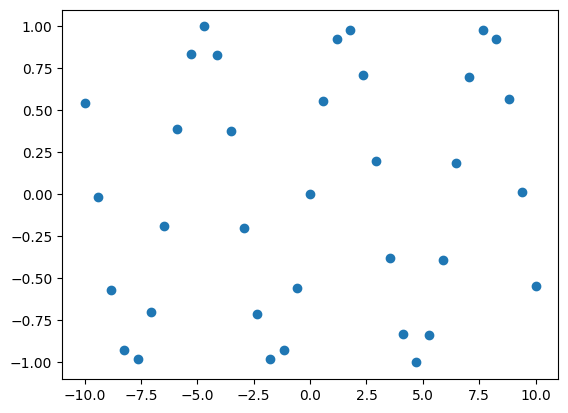

In [2]:
x=np.linspace(-10,10,35)
y=np.sin(1*x)

plt.plot(x,y,'o')

Remember in the previous tutorial, the third argument was used to specify the texture of the line being displayed. This argument can also be used to specify the shape of the point s that are being plotted. There are multiple shapes that can be used, all of which can be seen in the documentation, here are all of them in action.

In [3]:
from pathlib import Path
markers=pd.Series(Path('Markers.txt').read_text().split('\n')).str[1]
markers

0     .
1     ,
2     o
3     v
4     ^
5     <
6     >
7     1
8     2
9     3
10    4
11    8
12    s
13    p
14    P
15    *
16    h
17    H
18    +
19    x
20    X
21    D
22    d
23    |
24    _
dtype: object

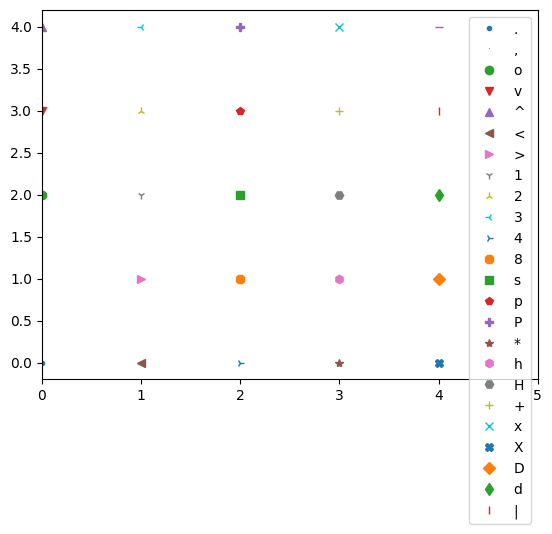

In [4]:
for index in markers.index:
    plt.plot(index//5,index%5,markers[index],label=str(markers[index]))
plt.xlim(0,5)
plt.legend()

Infact these shapes can be used in combination with the line plot as follows

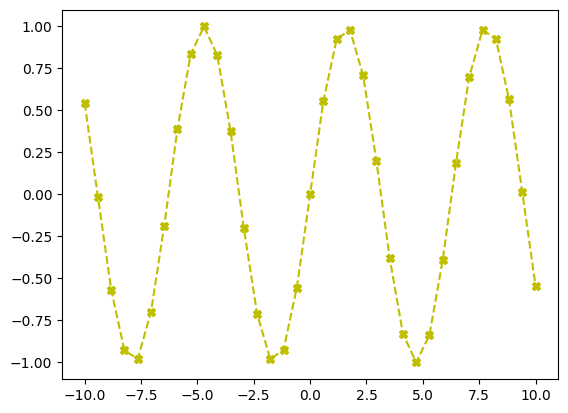

In [5]:
plt.plot(x,y,'--Xy')

There are multiple arguments within plt.plot function that can help you customize the marker's dimension.

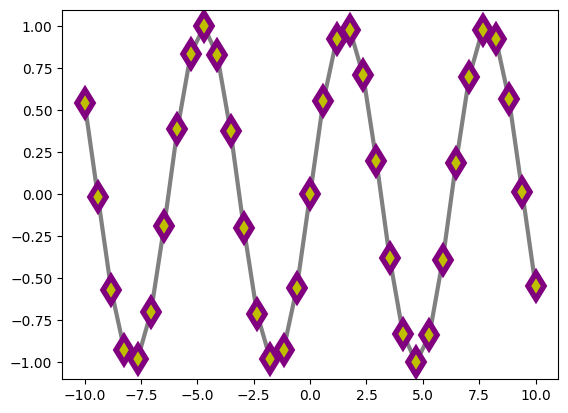

In [6]:
plt.plot(x,y,'-d',color='grey',
         linewidth=3,
         markersize=13,
         markerfacecolor='y',
         markeredgecolor='purple',
         markeredgewidth=4)

This flexibility provides a vide variety of visualization in `plt.plot()`

## Scatter Plots using `plt.scatter`

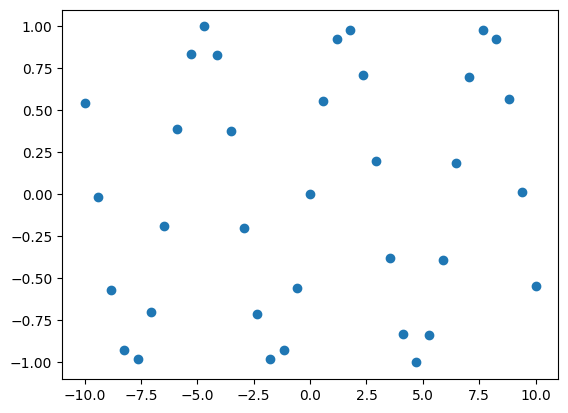

In [7]:
plt.scatter(x,y,marker='o')

The `plt.scatter` function is somewhat similar to `plt.plot` function. The only difference being in the freedom it gives in individually customizing each point(size, color, edge dimensions,etc.)

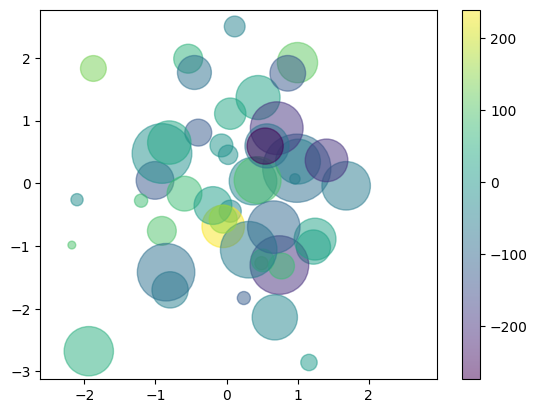

In [83]:
RandomState=np.random.RandomState()
x=RandomState.randn(100)
y=RandomState.randn(100)
colors=RandomState.normal(0,100,100)
sizes=1000*RandomState.randn(100)
plt.scatter(
    x,
    y,
    c=colors,
    s=sizes,
    alpha=.5,
    cmap='viridis',
)
plt.colorbar()